# Gibbs sampling

The objective of this notebook is to observe the inferred bivariate normal distribution by the Gibbs sampler.  

Based on "Code With ME - Gibbs sampling" (Youtube video)

In [25]:
import numpy as np

# generate samples from a multivariate normal distribution.
# mean = [0, 0]
# cov = [[1, 0.5], [0.5, 1]]
# size = 1000

automatic_sample = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

In [26]:
# reproductibility
np.random.seed(42)

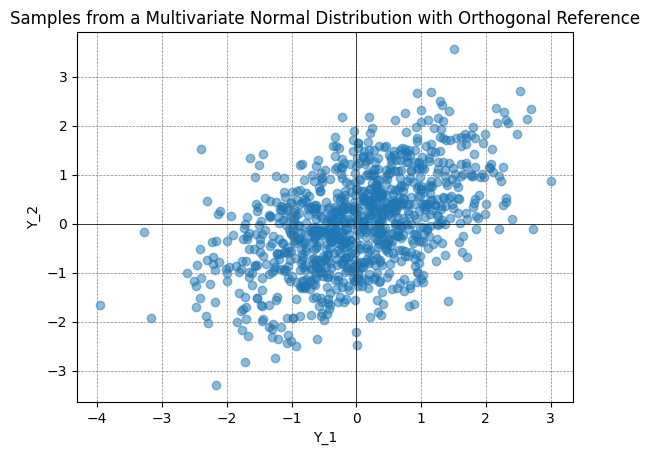

In [27]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(automatic_sample[:, 0], automatic_sample[:, 1], alpha=0.5)

# Add horizontal and vertical lines at the origin
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Add labels and title
plt.xlabel('Y_1')
plt.ylabel('Y_2')
plt.title('Samples from a Multivariate Normal Distribution with Orthogonal Reference')

# Show plot
plt.show()

### Gibbs sampling

In [28]:
# Reminder from conditional probability of 2D normal distribution N(mu, sigma):
# f(y2 | y1) = N(mu_2 + rho * sigma_2/sigma_1 * (y1 - mu_1), sigma_2^2 * (1 - rho^2))
# where mu_1, mu_2 are the means of the marginal distributions
# sigma_1, sigma_2 are the standard deviations of the marginal distributions

# In our case, we assume: 
# mu_1 = 0, mu_2 = 0, 
# sigma_1 = sigma_2 = 1, 
# sigma_21 = sigma12 = rho = 0.5

# So the conditional mean mu_2 + rho * sigma_2/sigma_1 * (y1 - mu_1) simplifies to rho * y1 ie. 0.5 * y1
# and the conditional variance sigma_2^2 * (1 - rho^2) simplifies to 0.75
# Gibbs sampling uses the last sample to generate the next one.
samples = {'x' : [1], 'y': [-1]}

num_samples = 1000

for _ in range(num_samples):
    curr_x = samples['x'][-1]
    new_x = np.random.normal(curr_x * 0.5, np.sqrt(0.75))
    new_y = np.random.normal(new_x * 0.5, np.sqrt(0.75))
    samples['x'].append(new_x)
    samples['y'].append(new_y)
    

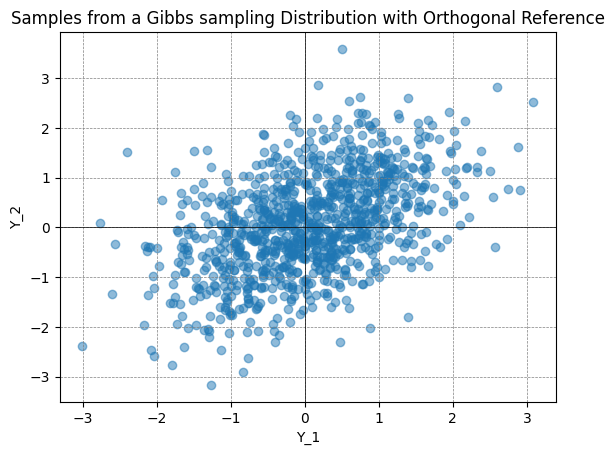

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(samples['x'], samples['y'], alpha=0.5)

# Add horizontal and vertical lines at the origin
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Add labels and title
plt.xlabel('Y_1')
plt.ylabel('Y_2')
plt.title('Samples from a Gibbs sampling Distribution with Orthogonal Reference')

# Show plot
plt.show()

(array([ 1.,  1.,  3.,  0., 11.,  4., 26., 19., 31., 54., 48., 57., 75.,
        84., 78., 79., 81., 74., 69., 64., 41., 31., 29., 11., 13.,  6.,
         3.,  4.,  2.,  2.]),
 array([-3.00887656, -2.80569161, -2.60250665, -2.39932169, -2.19613674,
        -1.99295178, -1.78976682, -1.58658187, -1.38339691, -1.18021195,
        -0.977027  , -0.77384204, -0.57065708, -0.36747213, -0.16428717,
         0.03889779,  0.24208274,  0.4452677 ,  0.64845266,  0.85163761,
         1.05482257,  1.25800753,  1.46119249,  1.66437744,  1.8675624 ,
         2.07074736,  2.27393231,  2.47711727,  2.68030223,  2.88348718,
         3.08667214]),
 <BarContainer object of 30 artists>)

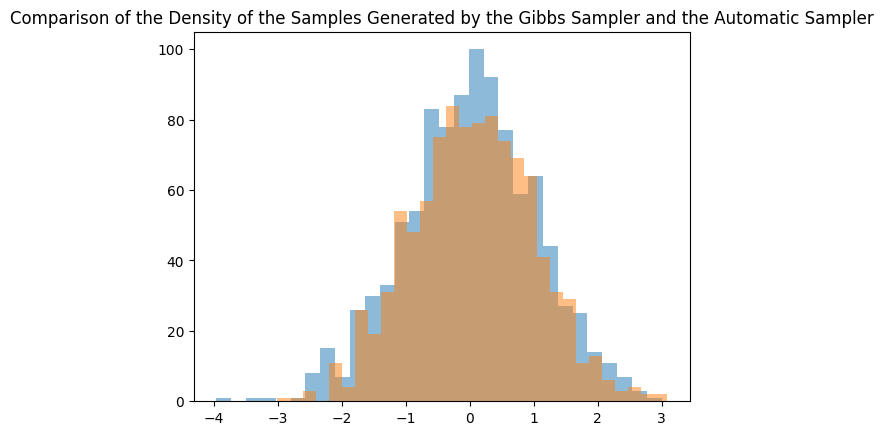

In [30]:
plt.title('Comparison of the Density of the Samples Generated by the Gibbs Sampler and the Automatic Sampler')
# First sample univariate normal distribution with first Gibbs sample
plt.hist(automatic_sample[:, 0], bins=30, alpha=0.5, label='Automatic Sampler')
plt.hist(samples['x'], bins=30, alpha=0.5, label='Gibbs Sampler')

(array([ 1.,  2.,  2.,  6.,  9., 10., 20., 27., 39., 39., 60., 71., 98.,
        84., 91., 82., 76., 65., 61., 51., 42., 21., 17., 14.,  6.,  4.,
         2.,  0.,  0.,  1.]),
 array([-3.16525658, -2.94023754, -2.71521849, -2.49019945, -2.2651804 ,
        -2.04016136, -1.81514231, -1.59012327, -1.36510423, -1.14008518,
        -0.91506614, -0.69004709, -0.46502805, -0.240009  , -0.01498996,
         0.21002908,  0.43504813,  0.66006717,  0.88508622,  1.11010526,
         1.33512431,  1.56014335,  1.78516239,  2.01018144,  2.23520048,
         2.46021953,  2.68523857,  2.91025762,  3.13527666,  3.3602957 ,
         3.58531475]),
 <BarContainer object of 30 artists>)

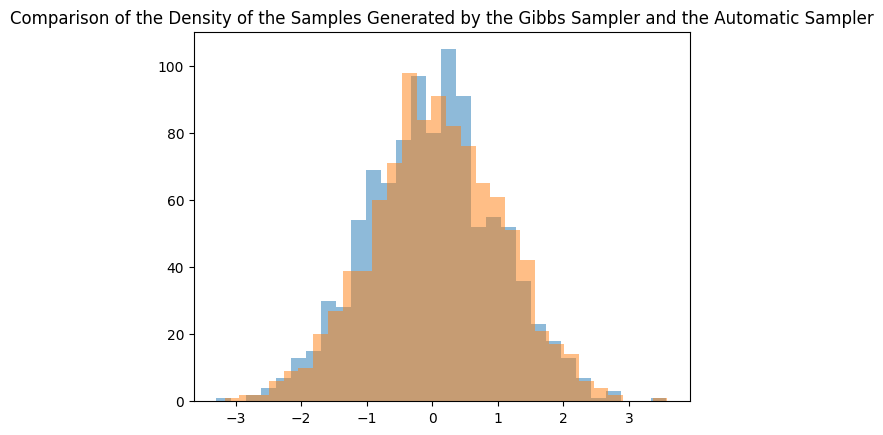

In [31]:
plt.title('Comparison of the Density of the Samples Generated by the Gibbs Sampler and the Automatic Sampler')
# Second sample univariate normal distribution with second Gibbs sample
plt.hist(automatic_sample[:, 1], bins=30, alpha=0.5, label='Automatic Sampler')
plt.hist(samples['y'], bins=30, alpha=0.5, label='Gibbs Sampler')

Text(0.5, 1.0, 'Correlation between consecutive samples: 0.4930559076643163')

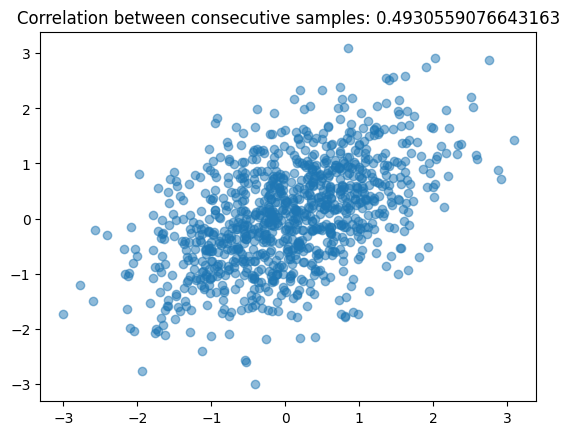

In [32]:
# Note that the as a MCMC algorithm, the Gibbs sampler is not guaranteed to converge to the true distribution.
# and the samples generated by the Gibbs sampler are not independent.
plt.scatter(samples['x'][:-1], samples['x'][1:], alpha=0.5)
pearson_corr = np.corrcoef(samples['x'][:-1], samples['x'][1:])[0, 1]
plt.title(f'Correlation between consecutive samples: {pearson_corr}')